In [11]:
import lifesim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bus = lifesim.Bus()
bus.build_from_config(filename='/home/ipa/quanz/user_accounts/fdannert/spie_22/40_experiments/S02_earth_twin/'
                      'S02_earth_twin.yaml')
bus.data.options.set_manual(instrumental_opt=True)

bus.data.import_catalog(input_path='/home/ipa/quanz/user_accounts/fdannert/spie_22/40_experiments/S02_earth_twin/'
                      'S02_earth_twin.hdf5',
                        noise_catalog=True)

instrument = lifesim.InstrumentPrt(name='inst')
bus.add_module(instrument)

instrument_base = lifesim.Instrument(name='inst_base')
bus.add_module(instrument_base)

bus.connect(('inst', 'inst_base'))

# ---------- Creating the Optimizer ----------
# After every planet is given an SNR, we want to distribute the time available in the search phase
# such that we maximize the number of detections.

# optimizing the result
opt = lifesim.Optimizer(name='opt')
bus.add_module(opt)
ahgs = lifesim.AhgsModule(name='ahgs')
bus.add_module(ahgs)

bus.connect(('opt', 'ahgs'))

opt.ahgs()

Importing Catalog...
[Done]
Importing Noise Catalog...
[Done]
[0.    0.    0.    0.    0.326]
[0.    0.    0.    0.    0.664]
[0.    0.    0.    0.    0.934]
[0.    0.    0.    0.    1.244]
[0.    0.    0.    0.    1.518]
[0.    0.    0.    0.    1.782]
[0.    0.    0.    0.    2.022]
[0.   0.   0.   0.   2.29]
[0.   0.   0.   0.   2.52]
[0.    0.    0.    0.    2.766]
[0.   0.   0.   0.   3.03]
[0.    0.    0.    0.    3.222]
[0.    0.    0.    0.    3.446]
[0.   0.   0.   0.   3.68]
[0.    0.    0.    0.    3.914]
[0.    0.    0.    0.    4.094]
[0.    0.    0.    0.    4.264]
[0.    0.    0.    0.    4.378]
[0.    0.    0.    0.    4.568]
[0.   0.   0.   0.   4.76]
[0.    0.    0.    0.    4.988]
[0.    0.    0.    0.    5.158]
[0.    0.    0.    0.    5.294]
[0.    0.    0.    0.    5.436]
[0.    0.    0.    0.    5.612]
[0.    0.    0.    0.    5.814]
[0.    0.    0.    0.    5.976]
[0.    0.    0.    0.    6.136]
[0.    0.    0.    0.    6.308]
[0.   0.   0.   0.   6.43]
[0.    0

[ 0.     0.     0.228  1.218 28.286]
[ 0.     0.     0.228  1.218 28.398]
[ 0.     0.     0.228  1.218 28.514]
[ 0.     0.     0.228  1.218 28.648]
[ 0.     0.     0.228  1.218 28.828]
[ 0.     0.     0.228  1.218 28.942]
[ 0.     0.     0.228  1.278 28.942]
[ 0.     0.     0.228  1.278 29.044]
[ 0.     0.     0.228  1.368 29.044]
[ 0.     0.     0.228  1.368 29.154]
[ 0.     0.     0.228  1.368 29.224]
[ 0.     0.     0.228  1.368 29.418]
[ 0.     0.     0.228  1.368 29.466]
[ 0.     0.     0.228  1.368 29.612]
[ 0.     0.     0.228  1.368 29.746]
[ 0.     0.     0.228  1.368 29.844]
[ 0.     0.     0.228  1.368 29.978]
[ 0.     0.     0.228  1.368 30.126]
[ 0.     0.     0.272  1.368 30.126]
[ 0.     0.     0.272  1.368 30.288]
[ 0.     0.     0.272  1.368 30.378]
[ 0.     0.     0.272  1.368 30.48 ]
[ 0.     0.     0.272  1.368 30.598]
[ 0.     0.     0.272  1.368 30.714]
[ 0.     0.     0.272  1.402 30.714]
[ 0.     0.     0.272  1.402 30.826]
[ 0.     0.     0.272  1.402 30.938]
[

In [15]:
yields = pd.DataFrame(columns=['number', 'method', 'stype'], index=np.arange(8))
stype = ['F', 'G', 'K', 'M']

In [18]:
for i in range(1, 5):
    yields.number.iloc[i-1] = bus.data.catalog.detected[bus.data.catalog.stype==i].sum()/500
    yields.method.iloc[i-1] = 'all'
    yields.stype.iloc[i-1] = stype[i-1]
    
    yields.number.iloc[i+3] = bus.data.catalog.detected[np.logical_and(bus.data.catalog.stype==i, bus.data.catalog.habitable)].sum()/500
    yields.method.iloc[i+3] = 'habitable'
    yields.stype.iloc[i+3] = stype[i-1]

Text(0, 0.5, 'Total Yield')

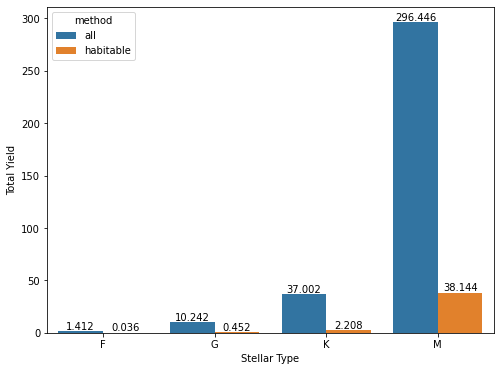

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x="stype", y="number", hue="method", data=yields)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Stellar Type')
plt.ylabel('Total Yield')